In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
dataframe = pd.read_csv("heart_cleveland_upload.csv")
dataframe.rename(columns={'condition':'target'}, inplace = True)
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


Проверка на незаполненные и нулевые значения:

In [5]:
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
dataframe.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Датасет фактически готов к использованию в моделях. Посмотрим на статистические показатели по числовым колонкам.

In [9]:
pd.set_option("display.float", "{:.2f}".format)
dfx = dataframe.drop(columns=["sex", "target"])
dfx.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00
mean,54.54,2.16,131.69,247.35,0.14,1.00,149.60,0.33,1.06,0.60,0.68,0.84
std,9.05,0.96,17.76,52.00,0.35,0.99,22.94,0.47,1.17,0.62,0.94,0.96
min,29.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,2.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,0.00,0.00,0.00
50%,56.00,2.00,130.00,243.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,0.00
75%,61.00,3.00,140.00,276.00,0.00,2.00,166.00,1.00,1.60,1.00,1.00,2.00
max,77.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,3.00,2.00


Число людей имеющих и не имеющих заболевание. 

In [10]:
dataframe.target.value_counts()

0    160
1    137
Name: target, dtype: int64

Число заболеваний в зависимости от пола.

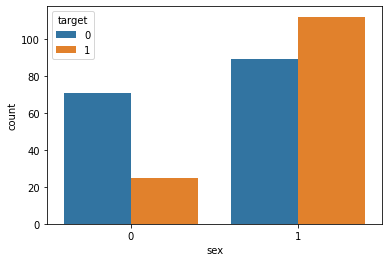

In [16]:
sns.countplot(x="sex", data=dataframe, hue="target")
plt.show()

По типу грудной боли.

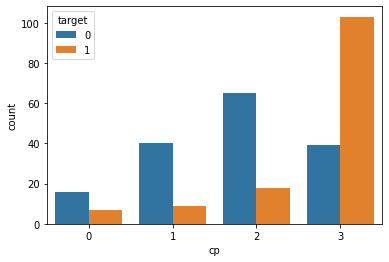

In [18]:
sns.countplot(x="cp", data=dataframe, hue="target")
plt.show()

Матрица корреляций

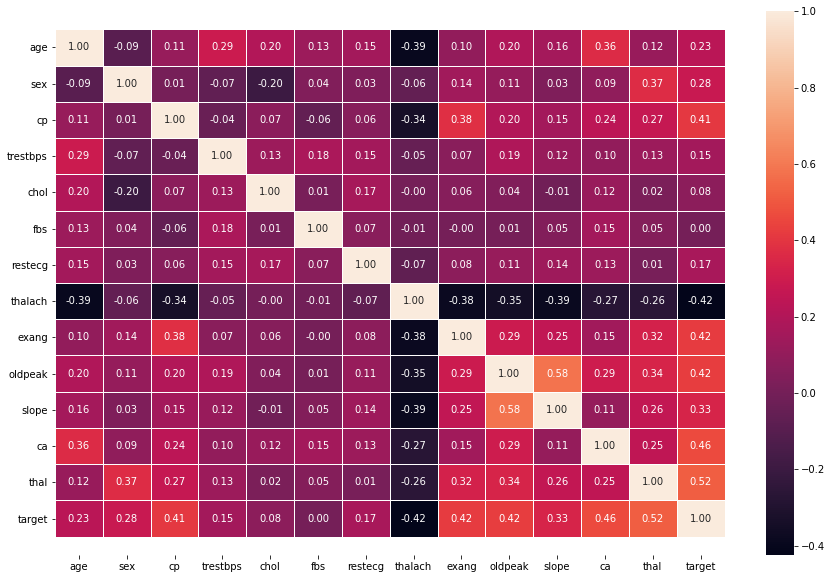

In [12]:
corr_matrix = dataframe.corr()
fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f");

bottom, top = ax.get_ylim()

ax.set_ylim(bottom + 0.5, top - 0.5);

Видим, что есть корреляции и зависимости. Хороший потенциал для применения моделей машинного обучения. 